# Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol.

Para isso, vamos seguir as etapas do processamento do Big Data

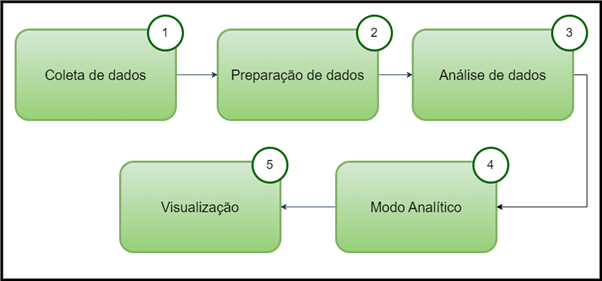

#Coleta dos dados
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes.

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv.

#Coleta dados dos estados

In [55]:
import pandas as pd

#leitura do arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')
estados.head()

id_estado    estado sigla_estado    pais
0          1      Acre           ac  Brasil
1          2   Alagoas           al     NaN
2          3     Amapá           ap  Brasil
3          4  Amazonas           am     NaN
4          5     Bahia           ba  Brasil

#Coleta dados de clientes

In [56]:
clientes = pd.read_excel('amostra_dados_clientes.xlsx')
clientes.head()

id_cliente   peso  colesterol     genero  id_estado
0           1  102.0         111  Masculino         23
1           2  115.0         135  Masculino          7
2           3  115.0         136  Masculino          4
3           4  140.0         167   Feminino         24
4           5  130.0         158  Masculino         26

#Coleta dados de idade de clientes

In [57]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')
idade.head()

id_cliente  idade
0           1     17
1           2     28
2           3     62
3           4     55
4           5     44

#Preparação dos dados


#Analisando as variáveis da base de dados

In [58]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [59]:
clientes.describe()

id_cliente        peso  colesterol   id_estado
count  225.000000  222.000000  225.000000  225.000000
mean   113.000000  142.315315  168.733333   13.711111
std     65.096083   31.198817   39.413671    7.562307
min      1.000000   95.000000  102.000000    1.000000
25%     57.000000  115.000000  135.000000    7.000000
50%    113.000000  138.500000  168.000000   14.000000
75%    169.000000  170.000000  204.000000   20.000000
max    225.000000  203.000000  235.000000   27.000000

In [60]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [61]:
estados.describe()

id_estado
count  27.000000
mean   14.000000
std     7.937254
min     1.000000
25%     7.500000
50%    14.000000
75%    20.500000
max    27.000000

In [62]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [63]:
idade.describe()

id_cliente       idade
count   547.00000  547.000000
mean    274.00000   42.791590
std     158.04957   15.160209
min       1.00000   16.000000
25%     137.50000   30.000000
50%     274.00000   42.000000
75%     410.50000   55.000000
max     547.00000   70.000000

#Analisando dados ausentes
Verificando valores ausentes ou nulos

In [64]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [65]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [66]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [67]:
#Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

id_cliente  peso  colesterol     genero  id_estado
32          33   NaN         188  Masculino         22
41          42   NaN         177  Masculino         20
87          88   NaN         168   Feminino         12

Identicamos 3 valores ausentes na base de dados de clientes.
Para esse caso, temos 3 opções para tratamento de dados númericos.

1. Eliminação dos registros (qd a base de dados é mt grande, pode ser pois não muda mt)
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor cetral dos dados)


Por exemplo:

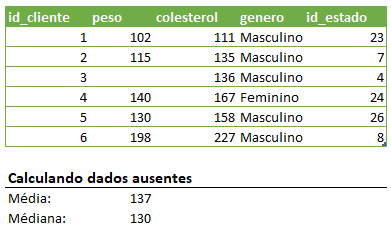


#Eliminando dados ausentes

In [68]:
#Removendo Dados Ausentes
clientes_remov = clientes.dropna(subset=['peso'], inplace=False)

In [69]:
clientes_remov.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [70]:
clientes_remov.count()

id_cliente    222
peso          222
colesterol    222
genero        222
id_estado     222
dtype: int64

In [71]:
#Realizando média e mediana
media_clientes = clientes.peso.mean()
mediana_clientes = clientes.peso.median()
print(f'O valor da média é {media_clientes} e da mediana é {mediana_clientes}')

O valor da média é 142.3153153153153 e da mediana é 138.5


In [72]:
#Como temos valores muito grandes, faremos o arredondamento
round(media_clientes,2)

142.32

In [73]:
clientes.describe()

id_cliente        peso  colesterol   id_estado
count  225.000000  222.000000  225.000000  225.000000
mean   113.000000  142.315315  168.733333   13.711111
std     65.096083   31.198817   39.413671    7.562307
min      1.000000   95.000000  102.000000    1.000000
25%     57.000000  115.000000  135.000000    7.000000
50%    113.000000  138.500000  168.000000   14.000000
75%    169.000000  170.000000  204.000000   20.000000
max    225.000000  203.000000  235.000000   27.000000

In [74]:
#Preencher valores ausentes pela média
clientes.peso.fillna(round(media_clientes,2), inplace=True)
#clientes_media
clientes

id_cliente   peso  colesterol     genero  id_estado
0             1  102.0         111  Masculino         23
1             2  115.0         135  Masculino          7
2             3  115.0         136  Masculino          4
3             4  140.0         167   Feminino         24
4             5  130.0         158  Masculino         26
..          ...    ...         ...        ...        ...
220         221  180.0         219  Masculino         20
221         222  116.0         138   Feminino         15
222         223  144.0         169   Feminino         18
223         224  102.0         116  Masculino          6
224         225  176.0         212  Masculino          7

[225 rows x 5 columns]

In [75]:
#Verifica se existe valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [76]:
clientes.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

#Substituindo variável categória
Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.


In [77]:
print(estados.pais.value_counts())

pais
Brasil    22
Name: count, dtype: int64


In [78]:
estados.pais.fillna('Brasil', inplace=True)

In [79]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando distribuição dos dados


In [80]:
import matplotlib.pyplot as plt

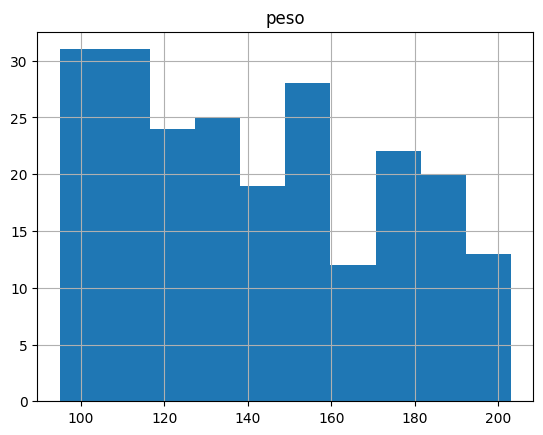

In [81]:
clientes.hist(column='peso')
plt.show()

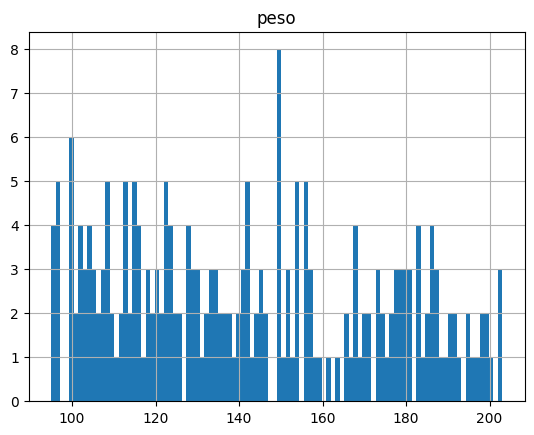

In [82]:
clientes.hist(column='peso', bins=100)
plt.show()

array([[<Axes: title={'center': 'colesterol'}>]], dtype=object)

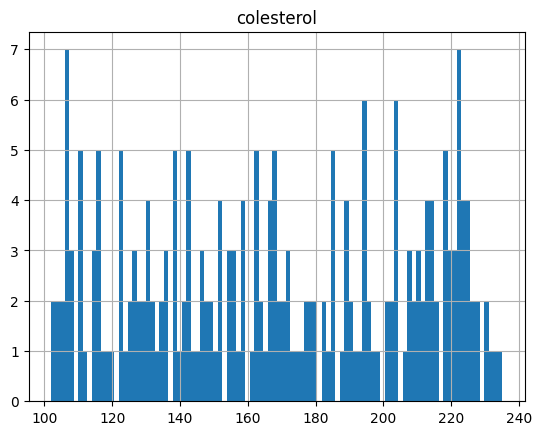

In [83]:
clientes.hist(column='colesterol', bins=100)

In [84]:
#Criando a variável de gênero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [85]:
clientes

id_cliente   peso  colesterol     genero  id_estado  genero_number
0             1  102.0         111  Masculino         23              1
1             2  115.0         135  Masculino          7              1
2             3  115.0         136  Masculino          4              1
3             4  140.0         167   Feminino         24              0
4             5  130.0         158  Masculino         26              1
..          ...    ...         ...        ...        ...            ...
220         221  180.0         219  Masculino         20              1
221         222  116.0         138   Feminino         15              0
222         223  144.0         169   Feminino         18              0
223         224  102.0         116  Masculino          6              1
224         225  176.0         212  Masculino          7              1

[225 rows x 6 columns]

array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

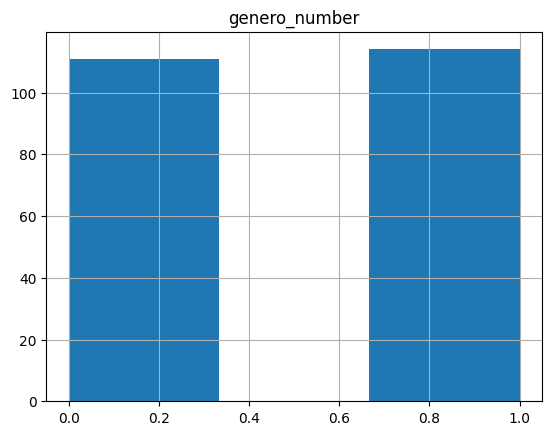

In [86]:
clientes.hist(column='genero_number', bins=3)

#Junção entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta


In [87]:
estados[:5]

id_estado    estado sigla_estado    pais
0          1      Acre           ac  Brasil
1          2   Alagoas           al  Brasil
2          3     Amapá           ap  Brasil
3          4  Amazonas           am  Brasil
4          5     Bahia           ba  Brasil

In [88]:
clientes[:5]

id_cliente   peso  colesterol     genero  id_estado  genero_number
0           1  102.0         111  Masculino         23              1
1           2  115.0         135  Masculino          7              1
2           3  115.0         136  Masculino          4              1
3           4  140.0         167   Feminino         24              0
4           5  130.0         158  Masculino         26              1

In [89]:
#Fazendo a junção das duas bases de dados e ordenando pelo id cliente
clientes_estados = pd.merge(clientes,estados, on = 'id_estado')
clientes_estados.sort_values('id_cliente')

id_cliente   peso  colesterol     genero  id_estado  genero_number  \
0             1  102.0         111  Masculino         23              1   
9             2  115.0         135  Masculino          7              1   
21            3  115.0         136  Masculino          4              1   
32            4  140.0         167   Feminino         24              0   
39            5  130.0         158  Masculino         26              1   
..          ...    ...         ...        ...        ...            ...   
167         221  180.0         219  Masculino         20              1   
126         222  116.0         138   Feminino         15              0   
196         223  144.0         169   Feminino         18              0   
77          224  102.0         116  Masculino          6              1   
20          225  176.0         212  Masculino          7              1   

                  estado sigla_estado    pais  
0                Roraima           rr  Brasil  
9       Distrito Federal           df  Brasil  
21              Amazonas           am  Brasil  
32        Santa Catarina           sc  Brasil  
39               Sergipe           se  Brasil  
..                   ...          ...     ...  
167  Rio Grande do Norte           rn  Brasil  
126              Paraíba           pb  Brasil  
196                Piauí           pi  Brasil  
77                 Ceará           ce  Brasil  
20      Distrito Federal           df  Brasil  

[225 rows x 9 columns]

In [90]:
#Fazendo a junção com as idades
base_completa = pd.merge(clientes_estados, idade, on = 'id_cliente').sort_values('id_cliente')
base_completa

id_cliente   peso  colesterol     genero  id_estado  genero_number  \
0             1  102.0         111  Masculino         23              1   
9             2  115.0         135  Masculino          7              1   
21            3  115.0         136  Masculino          4              1   
32            4  140.0         167   Feminino         24              0   
39            5  130.0         158  Masculino         26              1   
..          ...    ...         ...        ...        ...            ...   
167         221  180.0         219  Masculino         20              1   
126         222  116.0         138   Feminino         15              0   
196         223  144.0         169   Feminino         18              0   
77          224  102.0         116  Masculino          6              1   
20          225  176.0         212  Masculino          7              1   

                  estado sigla_estado    pais  idade  
0                Roraima           rr  Brasil     17  
9       Distrito Federal           df  Brasil     28  
21              Amazonas           am  Brasil     62  
32        Santa Catarina           sc  Brasil     55  
39               Sergipe           se  Brasil     44  
..                   ...          ...     ...    ...  
167  Rio Grande do Norte           rn  Brasil     33  
126              Paraíba           pb  Brasil     38  
196                Piauí           pi  Brasil     24  
77                 Ceará           ce  Brasil     31  
20      Distrito Federal           df  Brasil     57  

[225 rows x 10 columns]

In [91]:
base_completa.reset_index(drop=True)

id_cliente   peso  colesterol     genero  id_estado  genero_number  \
0             1  102.0         111  Masculino         23              1   
1             2  115.0         135  Masculino          7              1   
2             3  115.0         136  Masculino          4              1   
3             4  140.0         167   Feminino         24              0   
4             5  130.0         158  Masculino         26              1   
..          ...    ...         ...        ...        ...            ...   
220         221  180.0         219  Masculino         20              1   
221         222  116.0         138   Feminino         15              0   
222         223  144.0         169   Feminino         18              0   
223         224  102.0         116  Masculino          6              1   
224         225  176.0         212  Masculino          7              1   

                  estado sigla_estado    pais  idade  
0                Roraima           rr  Brasil     17  
1       Distrito Federal           df  Brasil     28  
2               Amazonas           am  Brasil     62  
3         Santa Catarina           sc  Brasil     55  
4                Sergipe           se  Brasil     44  
..                   ...          ...     ...    ...  
220  Rio Grande do Norte           rn  Brasil     33  
221              Paraíba           pb  Brasil     38  
222                Piauí           pi  Brasil     24  
223                Ceará           ce  Brasil     31  
224     Distrito Federal           df  Brasil     57  

[225 rows x 10 columns]

#Organizando a base de dados

Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.


In [92]:
#Alterando nomes das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace=True)
base_completa

cod_cliente   peso  colesterol     genero  id_estado  cod_genero  \
0              1  102.0         111  Masculino         23           1   
9              2  115.0         135  Masculino          7           1   
21             3  115.0         136  Masculino          4           1   
32             4  140.0         167   Feminino         24           0   
39             5  130.0         158  Masculino         26           1   
..           ...    ...         ...        ...        ...         ...   
167          221  180.0         219  Masculino         20           1   
126          222  116.0         138   Feminino         15           0   
196          223  144.0         169   Feminino         18           0   
77           224  102.0         116  Masculino          6           1   
20           225  176.0         212  Masculino          7           1   

                  estado sigla_estado    pais  idade  
0                Roraima           rr  Brasil     17  
9       Distrito Federal           df  Brasil     28  
21              Amazonas           am  Brasil     62  
32        Santa Catarina           sc  Brasil     55  
39               Sergipe           se  Brasil     44  
..                   ...          ...     ...    ...  
167  Rio Grande do Norte           rn  Brasil     33  
126              Paraíba           pb  Brasil     38  
196                Piauí           pi  Brasil     24  
77                 Ceará           ce  Brasil     31  
20      Distrito Federal           df  Brasil     57  

[225 rows x 10 columns]

In [93]:
#Alterando as linhas da variável sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [94]:
#Atribuindo nova nomeação na base completa
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa

cod_cliente   peso  colesterol     genero  id_estado  cod_genero  \
0              1  102.0         111  Masculino         23           1   
9              2  115.0         135  Masculino          7           1   
21             3  115.0         136  Masculino          4           1   
32             4  140.0         167   Feminino         24           0   
39             5  130.0         158  Masculino         26           1   
..           ...    ...         ...        ...        ...         ...   
167          221  180.0         219  Masculino         20           1   
126          222  116.0         138   Feminino         15           0   
196          223  144.0         169   Feminino         18           0   
77           224  102.0         116  Masculino          6           1   
20           225  176.0         212  Masculino          7           1   

                  estado sigla_estado    pais  idade  
0                Roraima           RR  Brasil     17  
9       Distrito Federal           DF  Brasil     28  
21              Amazonas           AM  Brasil     62  
32        Santa Catarina           SC  Brasil     55  
39               Sergipe           SE  Brasil     44  
..                   ...          ...     ...    ...  
167  Rio Grande do Norte           RN  Brasil     33  
126              Paraíba           PB  Brasil     38  
196                Piauí           PI  Brasil     24  
77                 Ceará           CE  Brasil     31  
20      Distrito Federal           DF  Brasil     57  

[225 rows x 10 columns]

# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.


In [95]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]]

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
9              2  Masculino     28  115.0         135          7   
21             3  Masculino     62  115.0         136          4   
32             4   Feminino     55  140.0         167         24   
39             5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
167          221  Masculino     33  180.0         219         20   
126          222   Feminino     38  116.0         138         15   
196          223   Feminino     24  144.0         169         18   
77           224  Masculino     31  102.0         116          6   
20           225  Masculino     57  176.0         212          7   

                  estado sigla_estado    pais  
0                Roraima           RR  Brasil  
9       Distrito Federal           DF  Brasil  
21              Amazonas           AM  Brasil  
32        Santa Catarina           SC  Brasil  
39               Sergipe           SE  Brasil  
..                   ...          ...     ...  
167  Rio Grande do Norte           RN  Brasil  
126              Paraíba           PB  Brasil  
196                Piauí           PI  Brasil  
77                 Ceará           CE  Brasil  
20      Distrito Federal           DF  Brasil  

[225 rows x 9 columns]

In [96]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)
base_completa

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
1              2  Masculino     28  115.0         135          7   
2              3  Masculino     62  115.0         136          4   
3              4   Feminino     55  140.0         167         24   
4              5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
220          221  Masculino     33  180.0         219         20   
221          222   Feminino     38  116.0         138         15   
222          223   Feminino     24  144.0         169         18   
223          224  Masculino     31  102.0         116          6   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado    pais  
0                Roraima           RR  Brasil  
1       Distrito Federal           DF  Brasil  
2               Amazonas           AM  Brasil  
3         Santa Catarina           SC  Brasil  
4                Sergipe           SE  Brasil  
..                   ...          ...     ...  
220  Rio Grande do Norte           RN  Brasil  
221              Paraíba           PB  Brasil  
222                Piauí           PI  Brasil  
223                Ceará           CE  Brasil  
224     Distrito Federal           DF  Brasil  

[225 rows x 9 columns]

#Análise dos dados
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [97]:
from sklearn.cluster import KMeans

In [98]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11): #do 1 ao 10, no programa tem que colocar 1 a mais
      kmeans = KMeans(n_clusters = k, random_state=0)
      kmeans.fit(X=dados_cliente)
      wcss.append(kmeans.inertia_)
    return wcss

In [99]:
dados_cliente = base_completa[['peso', 'colesterol', 'idade']]
dados_cliente.head()

peso  colesterol  idade
0  102.0         111     17
1  115.0         135     28
2  115.0         136     62
3  140.0         167     55
4  130.0         158     44

In [100]:
wcss_clientes = calcular_wcss(dados_cliente)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [101]:
type(wcss_clientes)

list

In [102]:
#Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 615755.6435484447
O cluster 1 possui valor de WCSS de: 189212.54409773235
O cluster 2 possui valor de WCSS de: 110985.62659521378
O cluster 3 possui valor de WCSS de: 85993.49644839708
O cluster 4 possui valor de WCSS de: 72765.0926995486
O cluster 5 possui valor de WCSS de: 60402.61567119764
O cluster 6 possui valor de WCSS de: 49363.864657354534
O cluster 7 possui valor de WCSS de: 42246.69687529805
O cluster 8 possui valor de WCSS de: 36793.297727438636
O cluster 9 possui valor de WCSS de: 31628.83439189302


#Visualizando o gráfico cotovelo

In [103]:
import plotly.express as px #Gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go #Criação e concatenização de gráficos

In [104]:
grafico_wcss = px.line( x = range(1,11),
                        y = wcss_clientes
                        )

fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss',
                  template =  'plotly_white'
                  )

fig.show()

In [105]:
kmeans_clientes = KMeans (n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)
base_completa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
1              2  Masculino     28  115.0         135          7   
2              3  Masculino     62  115.0         136          4   
3              4   Feminino     55  140.0         167         24   
4              5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
220          221  Masculino     33  180.0         219         20   
221          222   Feminino     38  116.0         138         15   
222          223   Feminino     24  144.0         169         18   
223          224  Masculino     31  102.0         116          6   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado    pais  cluster  
0                Roraima           RR  Brasil        1  
1       Distrito Federal           DF  Brasil        1  
2               Amazonas           AM  Brasil        1  
3         Santa Catarina           SC  Brasil        2  
4                Sergipe           SE  Brasil        2  
..                   ...          ...     ...      ...  
220  Rio Grande do Norte           RN  Brasil        0  
221              Paraíba           PB  Brasil        1  
222                Piauí           PI  Brasil        2  
223                Ceará           CE  Brasil        1  
224     Distrito Federal           DF  Brasil        0  

[225 rows x 10 columns]

#Calcula os centroides de cada cluster

In [106]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

In [107]:
grafico = px.scatter(x = base_completa['peso'],
                            y = base_completa['colesterol'],
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Peso',
                  yaxis_title= 'Colesterol',
                  )
grafico_final_petala.show()

# Visualizando e alterando layout do gráfico

In [108]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',
                  )


fig.show()

# Criando Função para Gerar gráficos


In [109]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x,
                      y = y,
                      color= base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,
                    )

  fig.show()

In [110]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [111]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [112]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

In [113]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos

In [114]:
cluster_clientes = base_completa
cluster_clientes

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
1              2  Masculino     28  115.0         135          7   
2              3  Masculino     62  115.0         136          4   
3              4   Feminino     55  140.0         167         24   
4              5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
220          221  Masculino     33  180.0         219         20   
221          222   Feminino     38  116.0         138         15   
222          223   Feminino     24  144.0         169         18   
223          224  Masculino     31  102.0         116          6   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado    pais  cluster  
0                Roraima           RR  Brasil        1  
1       Distrito Federal           DF  Brasil        1  
2               Amazonas           AM  Brasil        1  
3         Santa Catarina           SC  Brasil        2  
4                Sergipe           SE  Brasil        2  
..                   ...          ...     ...      ...  
220  Rio Grande do Norte           RN  Brasil        0  
221              Paraíba           PB  Brasil        1  
222                Piauí           PI  Brasil        2  
223                Ceará           CE  Brasil        1  
224     Distrito Federal           DF  Brasil        0  

[225 rows x 10 columns]

In [115]:
#Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Risco Moderado'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
1              2  Masculino     28  115.0         135          7   
2              3  Masculino     62  115.0         136          4   
3              4   Feminino     55  140.0         167         24   
4              5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
220          221  Masculino     33  180.0         219         20   
221          222   Feminino     38  116.0         138         15   
222          223   Feminino     24  144.0         169         18   
223          224  Masculino     31  102.0         116          6   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado    pais  cluster    nome_cluster  
0                Roraima           RR  Brasil        1     Baixo Risco  
1       Distrito Federal           DF  Brasil        1     Baixo Risco  
2               Amazonas           AM  Brasil        1     Baixo Risco  
3         Santa Catarina           SC  Brasil        2  Risco Moderado  
4                Sergipe           SE  Brasil        2  Risco Moderado  
..                   ...          ...     ...      ...             ...  
220  Rio Grande do Norte           RN  Brasil        0      Alto Risco  
221              Paraíba           PB  Brasil        1     Baixo Risco  
222                Piauí           PI  Brasil        2  Risco Moderado  
223                Ceará           CE  Brasil        1     Baixo Risco  
224     Distrito Federal           DF  Brasil        0      Alto Risco  

[225 rows x 11 columns]

#Análise dos clusters criados

In [116]:
#Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()


count       mean        std   min    25%   50%    75%   max
nome_cluster                                                               
Alto Risco       68.0  44.544118  15.977067  16.0  31.75  47.0  58.50  69.0
Baixo Risco      82.0  42.634146  15.442056  17.0  29.00  42.5  54.75  70.0
Risco Moderado   75.0  41.893333  14.699304  16.0  30.50  42.0  53.00  70.0

In [117]:
#Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

count unique               top freq
nome_cluster                                      
Alto Risco        68     24  Distrito Federal    6
Baixo Risco       82     26          Amazonas    8
Risco Moderado    75     26           Roraima    5

In [118]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Distrito Federal"')

cod_cliente     genero  idade   peso  colesterol  id_estado  \
46            47  Masculino     68  183.0         218          7   
57            58   Feminino     39  170.0         208          7   
123          124   Feminino     28  192.0         228          7   
130          131   Feminino     21  183.0         213          7   
132          133  Masculino     69  173.0         208          7   
224          225  Masculino     57  176.0         212          7   

               estado sigla_estado    pais  cluster nome_cluster  
46   Distrito Federal           DF  Brasil        0   Alto Risco  
57   Distrito Federal           DF  Brasil        0   Alto Risco  
123  Distrito Federal           DF  Brasil        0   Alto Risco  
130  Distrito Federal           DF  Brasil        0   Alto Risco  
132  Distrito Federal           DF  Brasil        0   Alto Risco  
224  Distrito Federal           DF  Brasil        0   Alto Risco

In [119]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%     50%  \
nome_cluster   genero                                                           
Alto Risco     Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
               Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   
Baixo Risco    Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Risco Moderado Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
               Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   191.00  203.0  
               Masculino  187.25  203.0  
Baixo Risco    Feminino   118.00  126.0  
               Masculino  115.50  124.0  
Risco Moderado Feminino   153.25  158.0  
               Masculino  149.50  157.0

#Exportando dados

In [120]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1')